In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
# Read the data file
data = pd.read_csv('../input/Reviews.csv')

In [3]:
#Have a look at the data
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
# Defining a program to pre-process the text data- 
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    
    # remove special characters and digits if any
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

data['Text'] = data['Text'].apply(lambda x:pre_process(x))

#show an example 'text'
data['Text'][2]

'this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of c s lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch '

In [5]:
# take the review text only
df= data['Text']

In [6]:
df.shape

(568454,)

In [7]:
# Applying Tf-Idf vectorizer to our text document and make a document-term matrix with top 5000 features(features are words)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.9, stop_words='english',max_features=5000)
X = tfidf.fit_transform(df)

In [8]:
# We can make a co-occurence matrix  by doing a dot product between the sparse matrix and its' transpose
A = X.T.dot(X)

In [9]:
# Now we apply matrix factorization using Truncated SVD.
# Vectorizer gives normalized results but LSA/ SVD results are not normalized, so we would also normalize them
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(n_components= 100)
normalizer = Normalizer(copy= False)
lsa = make_pipeline(svd, normalizer)

A_lsa = lsa.fit_transform(A)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))


Explained variance of the SVD step: 82%


In [10]:
# we need to find top 10 similar words using cosine similarity
# first getting the cosine similarity scores
from sklearn.metrics.pairwise import cosine_similarity
C = cosine_similarity(A[0:1], A)

In [11]:
C

array([[1.        , 0.37378661, 0.25716844, ..., 0.30075991, 0.19142396,
        0.17061317]])

In [12]:
# Getting the indices of the top ten similarity scores
sorted_indices = np.argsort(C)[0][-1:-11:-1]

In [13]:
sorted_indices

array([   0,  458, 2485, 2316, 1297, 4718, 4441, 2914, 2600, 4513])

In [14]:
# Getting the words by their indices
for i in sorted_indices:
    fname = list(tfidf.get_feature_names())[i]
    print(fname)

ability
br
like
just
don
update
taste
note
make
think


In [15]:
A_lsa.shape

(5000, 100)

In [16]:
from sklearn.cluster import KMeans

km = KMeans()
km.fit(A_lsa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
# The cluster centers

original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
    

In [18]:
# Getting the top 10 terms of each cluster
terms = tfidf.get_feature_names()
for i in range(8):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: br amazon product coffee good great like price just tea
Cluster 1: food br dog dogs cat treats cats loves like treat
Cluster 2: tea br like flavor taste good drink green great just
Cluster 3: br food like product just good taste great dog coffee
Cluster 4: br sauce like good great flavor just use product chicken
Cluster 5: coffee br cup like flavor taste good cups tea roast
Cluster 6: br like good great taste chocolate just love flavor product
Cluster 7: br like coffee taste tea flavor good just product great


In [19]:
str_txt = [terms[i] for i in order_centroids[i, :100]]
str_txt    


['br',
 'like',
 'coffee',
 'taste',
 'tea',
 'flavor',
 'good',
 'just',
 'product',
 'great',
 'water',
 'love',
 'really',
 'drink',
 've',
 'don',
 'use',
 'little',
 'tried',
 'chocolate',
 'sugar',
 'try',
 'amazon',
 'food',
 'make',
 'cup',
 'best',
 'time',
 'better',
 'sweet',
 'buy',
 'tastes',
 'price',
 'used',
 'flavors',
 'think',
 'way',
 'day',
 'hot',
 'nice',
 'bit',
 'stuff',
 'bag',
 'eat',
 'box',
 'bought',
 'mix',
 'delicious',
 'does',
 'did',
 'add',
 'favorite',
 'got',
 'milk',
 'know',
 'recommend',
 'want',
 'free',
 'strong',
 'didn',
 'makes',
 'store',
 'different',
 'bad',
 'say',
 'brand',
 'right',
 'lot',
 'll',
 'green',
 'order',
 'doesn',
 'perfect',
 'enjoy',
 'years',
 'dog',
 'organic',
 'quality',
 'definitely',
 'need',
 'salt',
 'sure',
 'ingredients',
 'using',
 'fresh',
 'chips',
 'bottle',
 'sauce',
 'easy',
 'wonderful',
 'natural',
 'coconut',
 'work',
 'high',
 'tasty',
 'hard',
 'long',
 'pack',
 'pretty',
 'thought']

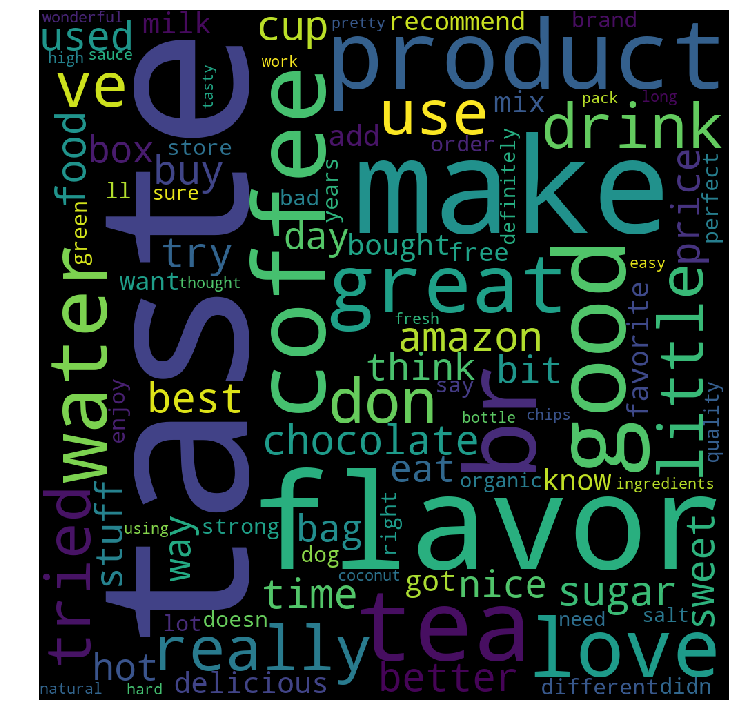

In [20]:
# Displaying this in a Wordcloud taking top 100 most common words from the first cluster 
# Displaying this in a Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

unique_string = (" ").join(str_txt)
wordcloud = WordCloud(width = 1000, height = 1000).generate(unique_string)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



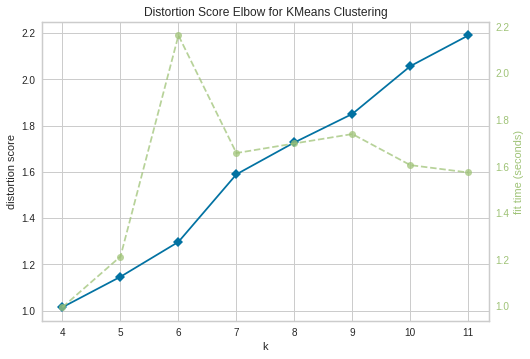

In [21]:
# Using elbow method to determine the number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(A_lsa)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data